In [7]:
from qiskit import *
from qiskit.providers.basic_provider import BasicProvider

%matplotlib inline


In [8]:
from qiskit.circuit import QuantumCircuit
def binary_circuit_add(circuit: QuantumCircuit) -> QuantumCircuit:
  circuit.ccx(0,1,3)
  circuit.cx(0, 1)
  circuit.ccx(0,1,2)
  circuit.cx(1, 0)
  circuit.ccx(0,1,2)
  return circuit

SUM is 1
CARRY-OUT is 0


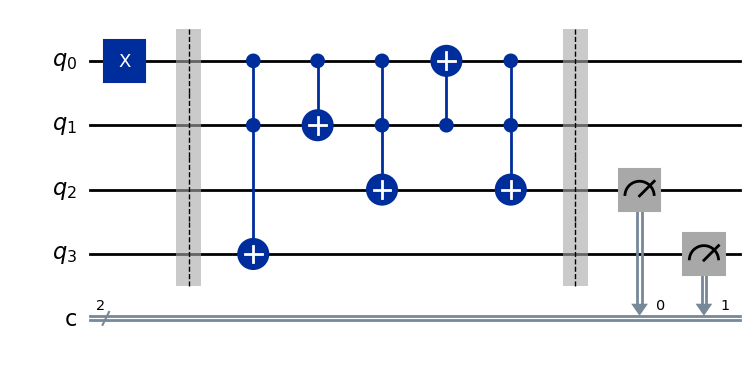

In [9]:
circuit = QuantumCircuit(4, 2)
circuit.x(0) # initalize input A
# circuit.x(1) # initalize input B
circuit.barrier()

### YOUR CODE GOES HERE ###
circuit = binary_circuit_add(circuit=circuit)

circuit.barrier()
circuit.measure(2, 0) # measure SUM
circuit.measure(3, 1) # measure CARRY-OUT
circuit.draw(output='mpl')

# UPDATE: Code updated after recording to resolve breaking changes from Qiskit 1.0
simulator = BasicProvider().get_backend('basic_simulator')
compiled_circuit = transpile(circuit, simulator)
result = simulator.run(compiled_circuit, shots=1).result()
counts = result.get_counts()
print(f'SUM is {list(counts.keys())[0][1]}')
print(f'CARRY-OUT is {list(counts.keys())[0][0]}')

In [12]:
def run_binary_adder(q0_state=0, q1_state=0):
    """
    Implements a binary adder quantum circuit.

    Args:
        q0_state (int): The initial state for qubit 0 (input A). 0 or 1.
        q1_state (int): The initial state for qubit 1 (input B). 0 or 1.

    Returns:
        tuple: A tuple containing the SUM and CARRY-OUT values.
    """
    circuit = QuantumCircuit(4, 2)

    if q0_state == 1:
        circuit.x(0)  # Initialize input A to |1>
    if q1_state == 1:
        circuit.x(1)  # Initialize input B to |1>

    circuit.barrier()

    # Binary adder logic
    circuit = binary_circuit_add(circuit=circuit)

    circuit.barrier()
    circuit.measure(2, 0)  # measure SUM
    circuit.measure(3, 1)  # measure CARRY-OUT

    # Simulation
    simulator = BasicProvider().get_backend('basic_simulator')
    compiled_circuit = transpile(circuit, simulator)
    result = simulator.run(compiled_circuit, shots=1).result()
    counts = result.get_counts()
    
    # The result is a string like '10' where the first char is CARRY-OUT and the second is SUM.
    if not counts:
        return None, None
    result_key = list(counts.keys())[0]
    sum_val = int(result_key[1])
    carry_out_val = int(result_key[0])

    return sum_val, carry_out_val

In [13]:
# Test the function for all 4 input combinations
for a in [0, 1]:
    for b in [0, 1]:
        sum_val, carry_out_val = run_binary_adder(a, b)
        if sum_val is not None:
            print(f'Input A: {a}, Input B: {b} -> SUM: {sum_val}, CARRY-OUT: {carry_out_val}')
        else:
            print(f'Input A: {a}, Input B: {b} -> No result')

Input A: 0, Input B: 0 -> SUM: 0, CARRY-OUT: 0
Input A: 0, Input B: 1 -> SUM: 1, CARRY-OUT: 0
Input A: 1, Input B: 0 -> SUM: 1, CARRY-OUT: 0
Input A: 1, Input B: 1 -> SUM: 0, CARRY-OUT: 1
